# Imports

In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import cvxpy as cp
from time import time
import collections
from typing import Dict
from typing import List
import pandas as pd
import numpy as np
from collections import defaultdict
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import imp
import os
import pickle as pk
%matplotlib inline

import sys
sys.path.insert(0, '../../../src/')

import network_utils
import utils

# Helper functions

In [2]:
def reload():
    imp.reload(network_utils)
    imp.reload(utils)
    
def get_array_of_138(a):
    r = a
    if len(a) < 138:
        r = np.array(list(a) + [0 for i in range(138 - len(a))])
    return r

def get_matrix_stochastic(a):
    a = a / np.sum(a)
    return np.matrix(a)

In [3]:
class Timer(object):
    def __init__(self, message=None):
        if message:
            self.message = message
        else:
            self.message = 'It took {elapsed_time:.2f} {unit}.'

    def __enter__(self):
        self.start = time()
        return None

    def __exit__(self, type, value, traceback):
        elapsed_time = time() - self.start
        if elapsed_time < 60:
            unit = 'seconds'
        elif elapsed_time < 3600:
            unit = 'minutes'
            elapsed_time /= 60.0
        else:
            unit = 'hours'
            elapsed_time /= 3600.0
        print(
            self.message.format(elapsed_time=elapsed_time, unit=unit))

# Body

In [4]:
triad_map, triad_list = network_utils.generate_all_possible_sparse_triads()
unique_triad_num = len(triad_list)

In [5]:
transitives = []
for triad in triad_list:
    transitives.append(network_utils.is_sparsely_transitive_balanced(triad))
transitives = np.array(transitives)

t = np.sum(transitives)
print('{} transitive and {} nontransitive.'.format(t, 138-t))



ch = []
for triad in triad_list:
    ch.append(network_utils.is_sparsely_cartwright_harary_balanced(triad))
ch = np.array(ch)

t = np.sum(ch)
print('{} C&H balance and {} non C&H balance.'.format(t, 138-t))



cluster = []
for triad in triad_list:
    cluster.append(network_utils.is_sparsely_clustering_balanced(triad))
cluster = np.array(cluster)

t = np.sum(cluster)
print('{} clustering balance and {} non C&H balance.'.format(t, 138-t))

93 transitive and 45 nontransitive.
24 C&H balance and 114 non C&H balance.
44 clustering balance and 94 non C&H balance.


In [6]:
periods = [['1995-01-01', '1995-03-26'],
 ['1995-03-26', '1995-06-18'],
 ['1995-06-18', '1995-09-10'],
 ['1995-09-10', '1995-12-03'],
 ['1995-12-03', '1996-02-25'],
 ['1996-02-25', '1996-05-19'],
 ['1996-05-19', '1996-08-11'],
 ['1996-08-11', '1996-11-03'],
 ['1996-11-03', '1997-01-26'],
 ['1997-01-26', '1997-04-20'],
 ['1997-04-20', '1997-07-13'],
 ['1997-07-13', '1997-10-05'],
 ['1997-10-05', '1997-12-28'],
 ['1997-12-28', '1998-03-22'],
 ['1998-03-22', '1998-06-14'],
 ['1998-06-14', '1998-09-06'],
 ['1998-09-06', '1998-11-29'],
 ['1998-11-29', '1999-02-21'],
 ['1999-02-21', '1999-05-16'],
 ['1999-05-16', '1999-08-08'],
 ['1999-08-08', '1999-10-31'],
 ['1999-10-31', '2000-01-23'],
 ['2000-01-23', '2000-04-16'],
 ['2000-04-16', '2000-07-09'],
 ['2000-07-09', '2000-10-01'],
 ['2000-10-01', '2000-12-24'],
 ['2000-12-24', '2001-03-18'],
 ['2001-03-18', '2001-06-10'],
 ['2001-06-10', '2001-09-02'],
 ['2001-09-02', '2001-11-25'],
 ['2001-11-25', '2002-02-17'],
 ['2002-02-17', '2002-05-12'],
 ['2002-05-12', '2002-08-04'],
 ['2002-08-04', '2002-10-27'],
 ['2002-10-27', '2003-01-19'],
 ['2003-01-19', '2003-04-13'],
 ['2003-04-13', '2003-07-06'],
 ['2003-07-06', '2003-09-28'],
 ['2003-09-28', '2003-12-21'],
 ['2003-12-21', '2004-03-14'],
 ['2004-03-14', '2004-06-06'],
 ['2004-06-06', '2004-08-29'],
 ['2004-08-29', '2004-11-21'],
 ['2004-11-21', '2005-02-13'],
 ['2005-02-13', '2005-05-08'],
 ['2005-05-08', '2005-07-31'],
 ['2005-07-31', '2005-10-23'],
 ['2005-10-23', '2006-01-15'],
 ['2006-01-15', '2006-04-09'],
 ['2006-04-09', '2006-07-02'],
 ['2006-07-02', '2006-09-24'],
 ['2006-09-24', '2006-12-17'],
 ['2006-12-17', '2007-03-11'],
 ['2007-03-11', '2007-06-03'],
 ['2007-06-03', '2007-08-26'],
 ['2007-08-26', '2007-11-18'],
 ['2007-11-18', '2008-02-10'],
 ['2008-02-10', '2008-05-04'],
 ['2008-05-04', '2008-07-27'],
 ['2008-07-27', '2008-10-19'],
 ['2008-10-19', '2009-01-11'],
 ['2009-01-11', '2009-04-05'],
 ['2009-04-05', '2009-06-28'],
 ['2009-06-28', '2009-09-20'],
 ['2009-09-20', '2009-12-13'],
 ['2009-12-13', '2010-03-07'],
 ['2010-03-07', '2010-05-30'],
 ['2010-05-30', '2010-08-22'],
 ['2010-08-22', '2010-11-14'],
 ['2010-11-14', '2011-02-06'],
 ['2011-02-06', '2011-05-01'],
 ['2011-05-01', '2011-07-24'],
 ['2011-07-24', '2011-10-16'],
 ['2011-10-16', '2012-01-08'],
 ['2012-01-08', '2012-04-01'],
 ['2012-04-01', '2012-06-24'],
 ['2012-06-24', '2012-09-16'],
 ['2012-09-16', '2012-12-09'],
 ['2012-12-09', '2013-03-03'],
 ['2013-03-03', '2013-05-26'],
 ['2013-05-26', '2013-08-18'],
 ['2013-08-18', '2013-11-10'],
 ['2013-11-10', '2014-02-02'],
 ['2014-02-02', '2014-04-27'],
 ['2014-04-27', '2014-07-20'],
 ['2014-07-20', '2014-10-12'],
 ['2014-10-12', '2015-01-04'],
 ['2015-01-04', '2015-03-29'],
 ['2015-03-29', '2015-06-21'],
 ['2015-06-21', '2015-09-13'],
 ['2015-09-13', '2015-12-06'],
 ['2015-12-06', '2016-02-28'],
 ['2016-02-28', '2016-05-22'],
 ['2016-05-22', '2016-08-14'],
 ['2016-08-14', '2016-11-06'],
 ['2016-11-06', '2017-01-29'],
 ['2017-01-29', '2017-04-23'],
 ['2017-04-23', '2017-07-16'],
 ['2017-07-16', '2017-10-08'],
 ['2017-10-08', '2017-12-31'],
 ['2017-12-31', '2018-03-25'],
 ['2018-03-25', '2018-06-17'],
 ['2018-06-17', '2018-09-09']]

In [7]:
end_indices = []
for i, period in enumerate(periods):
    if ('-12-' in period[1] or '-11-' in period[1] or '-10-' in period[1]) and (i - 1 not in end_indices and i - 2 not in end_indices):
            end_indices.append(i)
end_indices.append(len(periods) - 1)
to_be_forecasted_indices = end_indices

In [8]:
to_be_forecasted_indices = to_be_forecasted_indices[:6]

## Convex optimization problem

In [9]:
loaded_d = utils.load_it('/home/omid/Downloads/DT/cvx_data.pk')
obs = loaded_d['obs']
T = loaded_d['T']

obs_mat = []
for o in obs:
    obs_mat.append(np.matrix(o))
    
obs_normalized = []
for o in obs:
    obs_normalized.append(get_matrix_stochastic(o))

In [10]:
# l = len(T) - 1
# test_numbers = 10

# l = 20
# test_numbers = 3

In [11]:
r = obs_normalized

In [253]:
# T = [
#     utils.make_matrix_row_stochastic(T[i])
#     for i in range(len(T))]

In [26]:
def compute_my_proposed_errs(lambda1, to_be_forecasted_indices, delta, T, r, with_percentage=False):
    lam2 = 0.1
    errs = []
    for index, test_number in enumerate(to_be_forecasted_indices):
        if with_percentage:
            print(np.round(100 * index / len(to_be_forecasted_indices), 2))

        window_start = max(0, test_number - delta + 1)

        P = [cp.Variable(n, n) for _ in range(window_start, test_number + 1)]
#         print('We have {} variables.'.format(len(P)))

        loss = 0
        for i in range(len(P) - 1):
#             print('injaa:', window_start + i)
            loss += cp.norm2(P[i] - T[window_start + i])**2

        regularization = 0

        term1 = 0
        for i in range(1, len(P)):
#             term1 += np.exp(2 + i - len(P)) * cp.norm1(P[i] - P[i - 1])
            term1 += cp.norm1(P[i] - P[i - 1])

#         term2 = 0
#         for i in range(1, len(P)):
#             term2 += cp.norm2(P[i] - P[i - 1])

        regularization = term1   # + lam2 * term2

        objective = cp.Minimize(loss + lambda1 * regularization)

        # Constraints.
        constraints = []
        for i in range(len(P)):
            constraints += (
                [0 < P[i],
                 cp.sum_entries(P[i], axis=1) == 1])

        # Problem.
        prob = cp.Problem(objective, constraints)

        # Solving the problem.
        res = prob.solve(cp.MOSEK)
    #     err = np.linalg.norm(r[l - test_number] - (r[l - test_number - 1] * P[l - test_number - 2].value), 2)

        ### Forecast methods:
        forecast_matrix = P[-1].value

#         forecast_matrix = utils.make_matrix_row_stochastic(np.mean([item.value for item in P], axis=0))

#         forecast_matrix = np.zeros((n, n))
#         for i in range(len(P) - 1):
#             forecast_matrix += np.exp(2 + i - len(P)) * P[i].value
#         forecast_matrix = utils.make_matrix_row_stochastic(forecast_matrix)

#         err = np.sqrt(np.linalg.norm(forecast_matrix - T[test_number], 2))
        err = np.sqrt(np.linalg.norm(r[test_number] - (r[test_number - 1] * forecast_matrix), 2))
        errs.append(err)
    return errs

# Hyperparameter tuning

In [ ]:
n = 138
delta = 8  # and 2 both have 0.001 as the best.
all_errorz = defaultdict(list)

lambdas = [0, 0.001, 0.01, 0.02, 0.05, 0.1, 1, 10, 100]
with Timer():
    for lamb1 in lambdas:
        print(lamb1)
        all_errorz[lamb1] = compute_my_proposed_errs(lamb1, to_be_forecasted_indices, delta, T, r)

In [267]:
lambdas

[0, 0.001, 0.01, 0.02, 0.05, 0.1, 1, 10, 100]

In [276]:
np.arange(len(lambdas))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

/home/omid/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


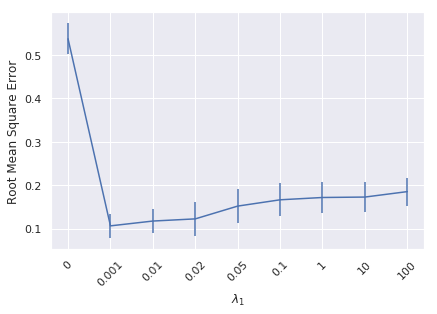

In [283]:
sns.set(rc={'figure.figsize': (6, 4)})
meanz = []
stdz = []
for lam1 in lambdas:
    meanz.append(np.mean(all_errorz[lam1]))
    stdz.append(np.std(all_errorz[lam1]))
plt.errorbar(np.arange(len(lambdas)), y=meanz, yerr=stdz)
ax = plt.axes()
plt.tight_layout()
plt.xlabel('$\lambda_1$')
plt.ylabel('Root Mean Square Error')
ax.set_xticklabels([0] + lambdas, rotation=45)

plt.savefig('ICEWS_RMSE_lambda_tuning_delta=8.pdf');
plt.savefig('ICEWS_RMSE_lambda_tuning_delta=8.png');

# Running the best model on entire dataset

In [105]:
# end_indices = []
# for i, period in enumerate(periods):
#     if ('-12-' in period[1] or '-11-' in period[1] or '-10-' in period[1]) and (i - 1 not in end_indices and i - 2 not in end_indices):
#             end_indices.append(i)
# end_indices.append(len(periods) - 1)
# to_be_forecasted_indices = end_indices

In [115]:
to_be_forecasted_indices = [3, 7, 11, 16, 20, 23, 29, 33, 38, 42, 46, 50, 55, 59, 64, 67, 72, 77, 80, 85, 89, 94, 98, 102]

In [116]:
for i in to_be_forecasted_indices:
    print('{}'.format(periods[i][1][:7][:4]), '=>', i, '=>', periods[i])

1995 => 3 => ['1995-09-10', '1995-12-03']
1996 => 7 => ['1996-08-11', '1996-11-03']
1997 => 11 => ['1997-07-13', '1997-10-05']
1998 => 16 => ['1998-09-06', '1998-11-29']
1999 => 20 => ['1999-08-08', '1999-10-31']
2000 => 23 => ['2000-04-16', '2000-07-09']
2001 => 29 => ['2001-09-02', '2001-11-25']
2002 => 33 => ['2002-08-04', '2002-10-27']
2003 => 38 => ['2003-09-28', '2003-12-21']
2004 => 42 => ['2004-08-29', '2004-11-21']
2005 => 46 => ['2005-07-31', '2005-10-23']
2006 => 50 => ['2006-07-02', '2006-09-24']
2007 => 55 => ['2007-08-26', '2007-11-18']
2008 => 59 => ['2008-07-27', '2008-10-19']
2009 => 64 => ['2009-09-20', '2009-12-13']
2010 => 67 => ['2010-05-30', '2010-08-22']
2011 => 72 => ['2011-07-24', '2011-10-16']
2012 => 77 => ['2012-09-16', '2012-12-09']
2013 => 80 => ['2013-05-26', '2013-08-18']
2014 => 85 => ['2014-07-20', '2014-10-12']
2015 => 89 => ['2015-06-21', '2015-09-13']
2016 => 94 => ['2016-08-14', '2016-11-06']
2017 => 98 => ['2017-07-16', '2017-10-08']
2018 => 102 =

In [108]:
n = 138
# eps = 0.01
# lam1 = 0.6
# lam1 = 10
# lam2 = 0.2
delta = 8

best_lambda1 = 0.001
with Timer():
    errs = compute_my_proposed_errs(best_lambda1, to_be_forecasted_indices, delta, T, r, with_percentage=True)
print('Errors: {} +- {}'.format(round(np.mean(errs), 4), round(np.std(errs)), 6))
print(errs)

0.0
4.17
8.33
12.5
16.67
20.83
25.0
29.17
33.33
37.5
41.67
45.83
50.0
54.17
58.33
62.5
66.67
70.83
75.0
79.17
83.33
87.5
91.67
95.83
It took 2.66 minutes.
Errors: 0.0855 +- 0.0
[0.096782300031621, 0.0834957991137009, 0.11756833145686288, 0.13544070064296762, 0.062252802859079685, 0.058480029481715136, 0.13523527336916358, 0.040522455998571016, 0.09666219613990511, 0.09544253056695223, 0.052999408026260776, 0.09552499942220306, 0.03874010008224696, 0.12538237327955226, 0.03683116384039534, 0.06858881418183306, 0.14347238307354937, 0.09742987296642404, 0.04326506674572586, 0.10671014410680388, 0.09110972653467532, 0.06783701576114917, 0.08174708984906945, 0.08013305206329087]


In [117]:
# Baselines.
mean_errs = []
for test_number in to_be_forecasted_indices:
    mean_matrix = utils.make_matrix_row_stochastic(np.mean(T[:test_number - 1], axis=0))
#     mean_err = np.sqrt(np.linalg.norm(T[test_number] - mean_matrix, 2))
    mean_err = np.sqrt(np.linalg.norm(r[test_number] - r[test_number - 1] * mean_matrix, 2))
    mean_errs.append(mean_err)
    
# mean_window_errs = []
# for test_number in to_be_forecasted_indices:
#     window_start = max(0, test_number - delta + 1)
#     mean_matrix = utils.make_matrix_row_stochastic(np.mean(T[window_start:test_number - 1], axis=0))
# #     mean_err = np.sqrt(np.linalg.norm(T[test_number] - mean_matrix, 2))
#     mean_err = np.sqrt(np.linalg.norm(r[test_number] - r[test_number - 1] * mean_matrix, 2))
#     mean_window_errs.append(mean_err)

last_errs = []
for test_number in to_be_forecasted_indices:
#     last_err = np.sqrt(np.linalg.norm(T[test_number] - T[test_number - 1], 2))
    last_err = np.sqrt(np.linalg.norm(r[test_number] - r[test_number - 1], 2))
    last_errs.append(last_err)

transition_counting_errs = []
for test_number in to_be_forecasted_indices:
    transition_counting_err = np.sqrt(np.linalg.norm(r[test_number] - r[test_number - 1] * T[test_number - 2], 2))
    transition_counting_errs.append(transition_counting_err)
    
rnd_errs = []
for test_number in to_be_forecasted_indices:
    rnd_vector = np.random.uniform(0, 1, size=[138])
    rnd_vector /= sum(rnd_vector)
    mean_err = np.sqrt(np.linalg.norm(r[test_number] - rnd_vector, 2))
    rnd_errs.append(last_err)
    
uniform_errs = []
uniform_vector = np.ones(138) / 138
for test_number in to_be_forecasted_indices:
    uniform_err = np.sqrt(np.linalg.norm(r[test_number] - uniform_vector, 2))
    uniform_errs.append(uniform_err)

/home/omid/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


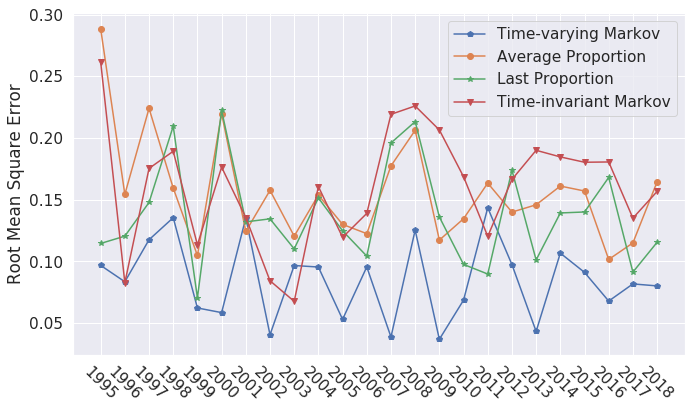

In [129]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.4)
plt.plot(errs, '-p')
plt.plot(mean_errs, '-o')
# plt.plot(mean_window_errs, '-.')
plt.plot(last_errs, '-*')
plt.plot(transition_counting_errs, '-v')
# plt.plot(rnd_errs, '-^')
# plt.plot(uniform_errs, '-x')
# plt.legend(['Time-varying Markov', 'Average Proportion', 'Window Average Proportion', 'Last Proportion', 'Time-invariant Markov' , 'Random', 'Uniform'])
plt.legend(['Time-varying Markov', 'Average Proportion', 'Last Proportion', 'Time-invariant Markov'])
# plt.xlabel('Period')
plt.ylabel('Root Mean Square Error')

# seting xticks
ax = plt.axes()
number_of_periods = len(errs)
ax.set_xticks(list(range(number_of_periods)))
labels = []
for i in to_be_forecasted_indices:
    labels.append(
        '{}'.format(periods[i][1][:7][:4]))
ax.set_xticklabels(labels, rotation=-45)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")
    
# plt.setp(ax.xaxis.get_majorticklabels(), rotation=45) 
plt.tight_layout()
    
plt.savefig('ICEWS_RMSE_103_lambda_001_delta_8.pdf');
plt.savefig('ICEWS_RMSE_103_lambda_001_delta_8.png');

In [ ]:
# sns.set(rc={'figure.figsize': (6, 4)})
# plt.plot(errs, '-p')
# plt.plot(mean_errs, '-o')
# plt.plot(last_errs, '-*')
# plt.legend(['Time-varying Markov', 'Average Proportion', 'Last Proportion', 'Individual Markov'])
# plt.ylabel('Root Mean Square Error')
# # seting xticks
# ax = plt.axes()
# number_of_periods = len(errs)
# ax.set_xticks(list(range(number_of_periods)))

# labels = []
# for i in to_be_forecasted_indices:
#     labels.append(
#         '{}'.format(periods[i][1][:7][:4]))
# ax.set_xticklabels(labels, rotation=45);
# for tick in ax.xaxis.get_majorticklabels():
#     tick.set_horizontalalignment("right")
# # plt.savefig('country_RMSE_20_5.png');